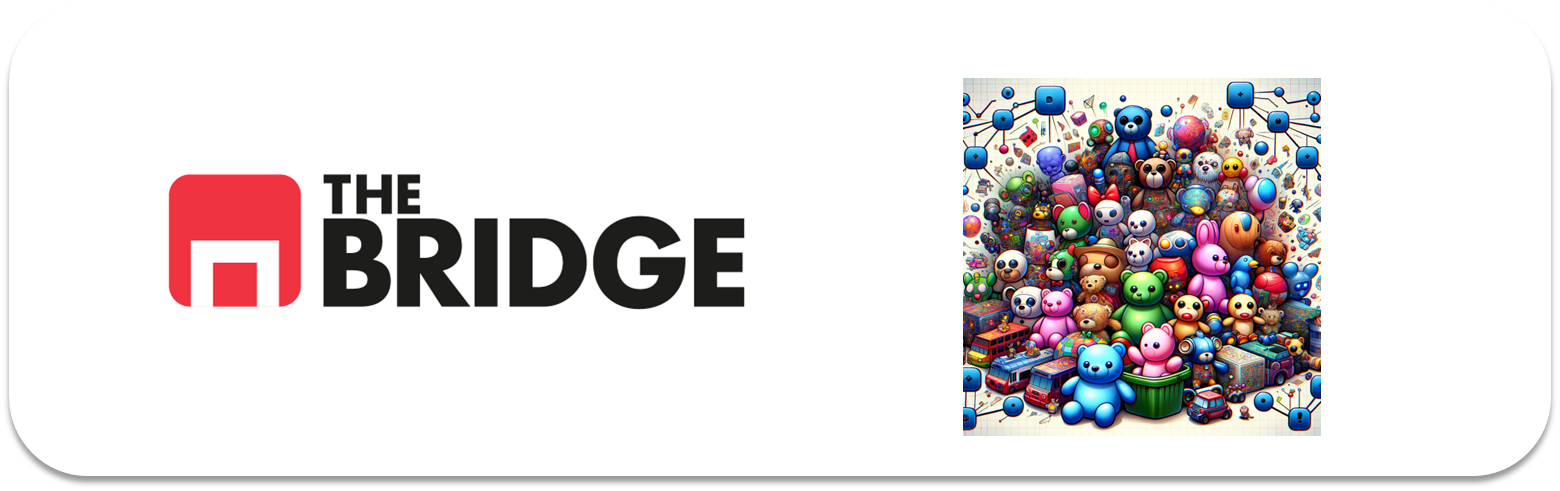

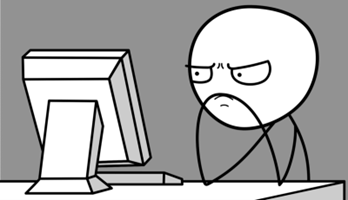

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [7]:
drink = pd.read_csv("./data/empowering_drinks.csv", sep= "|")

In [8]:
drink

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276
...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783
149,0.332758,-0.389355,-1.344582,0.280575,2.224236
150,0.209232,0.012732,-1.354622,0.296498,1.834923
151,1.395086,1.365208,-1.274305,-0.595160,1.791666


In [9]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [10]:
drink.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


Son todos numéricos. Hay valores maximos y minimos alejados de la media, igual son outliers?

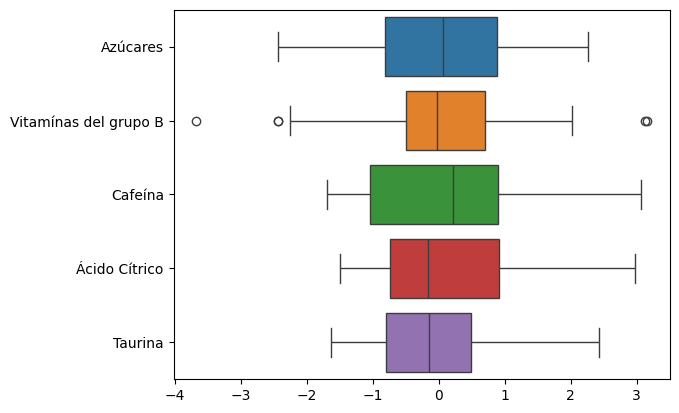

In [11]:
sns.boxplot(drink, orient='h');

<Axes: ylabel='Count'>

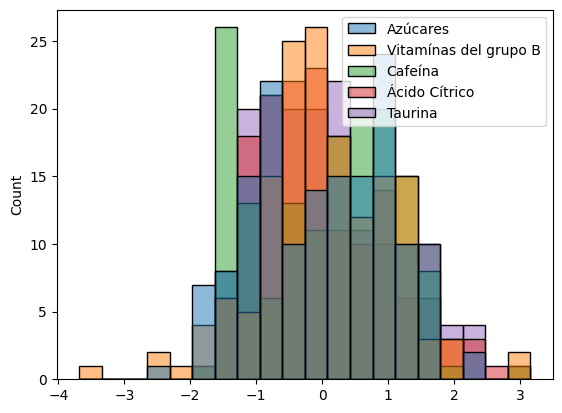

In [22]:
sns.histplot(drink)

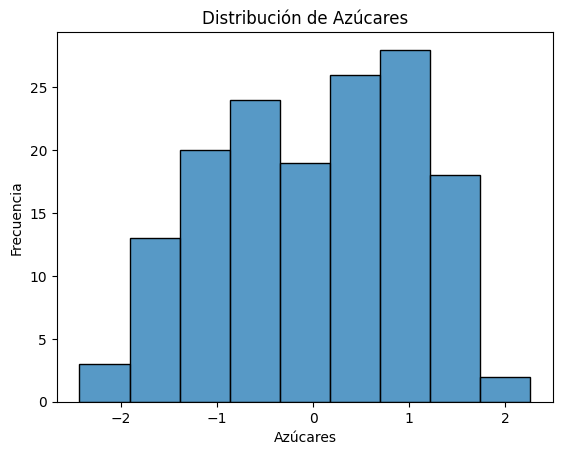

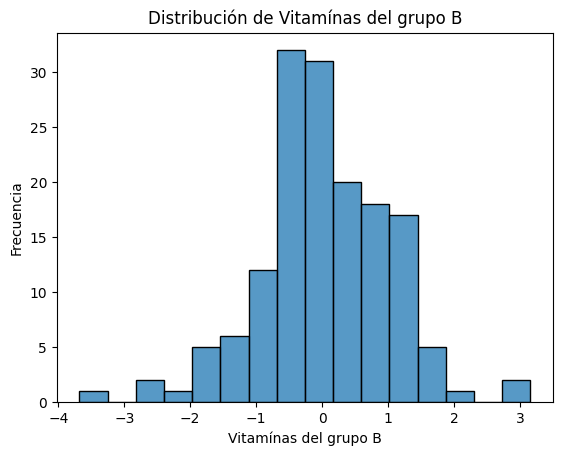

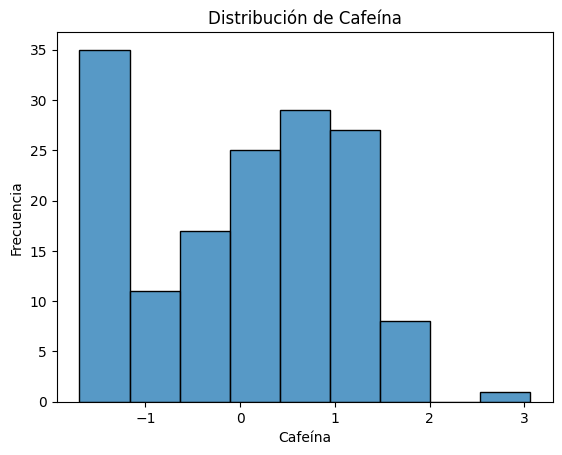

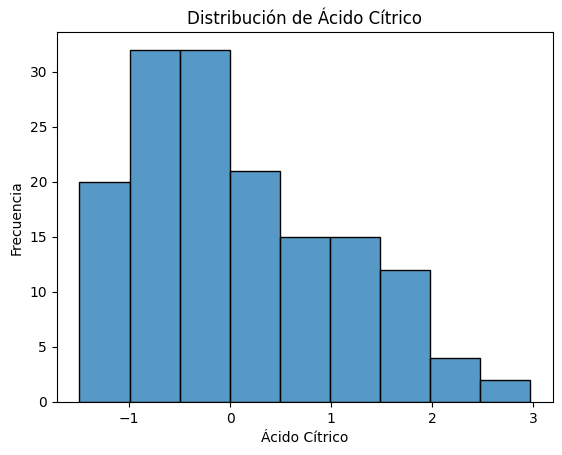

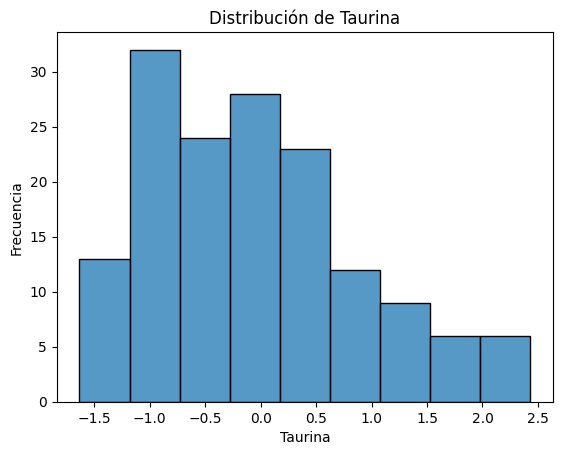

In [21]:
for column in drink.columns:
    sns.histplot(drink[column])
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

Acido citrico y taurina son muy parecidas. Podriamos eliminar una de ellas. 

Vitaminas del grupo B tiene outliers pero los voy a dejar por si fueran también informativos.

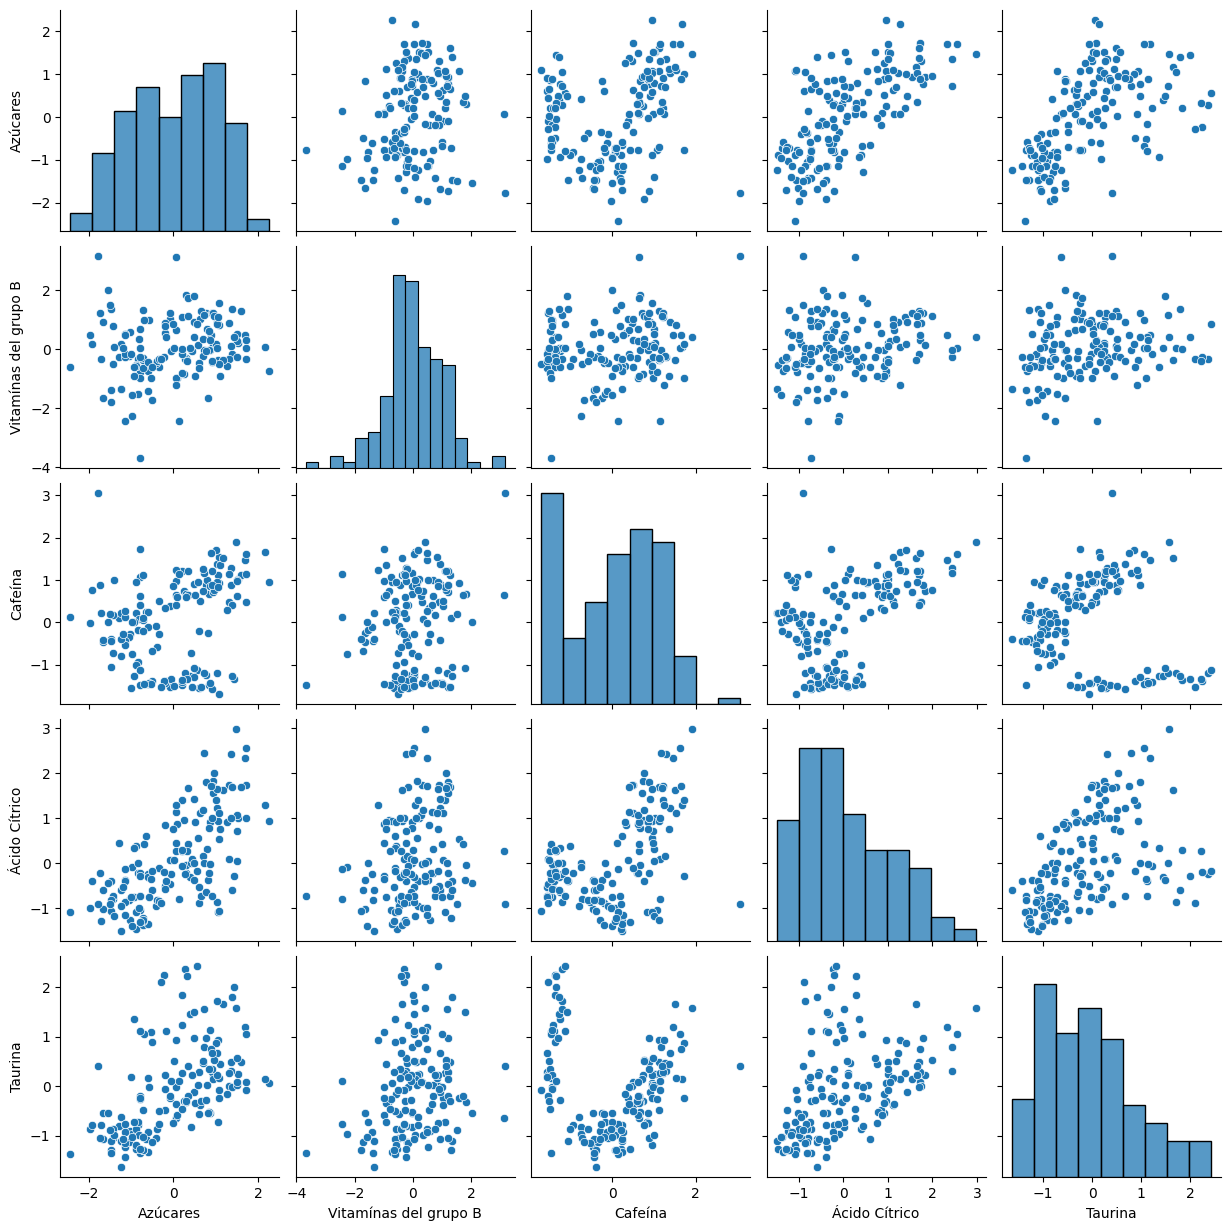

In [23]:
sns.pairplot(drink)

Me da la sencacion que Cafeina y taurina o Cafeina y Azucares si tienen grupos.

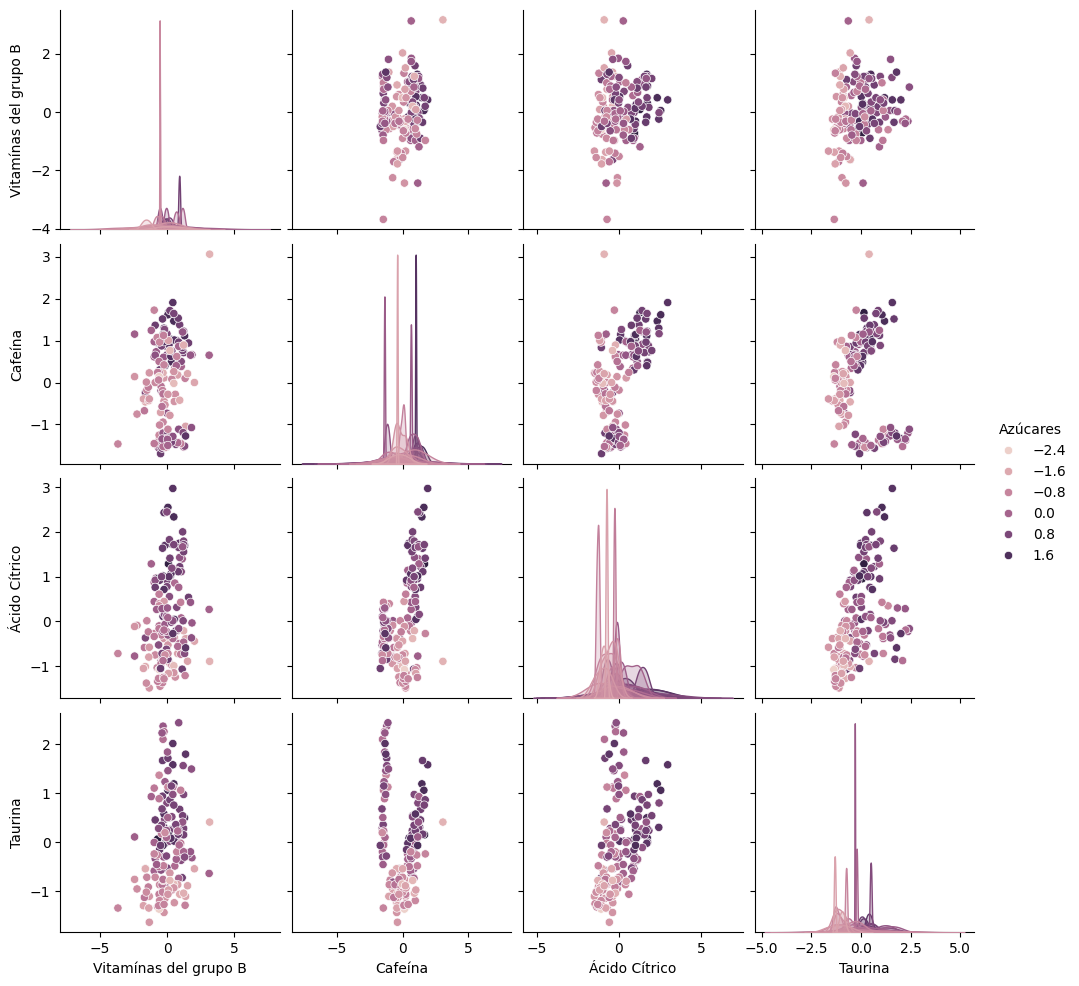

In [32]:
sns.pairplot(drink, hue = "Azúcares")

Voy a escalar por si acaso:

In [34]:
drink_scal = drink.copy()

array([[<Axes: title={'center': 'Azúcares'}>,
        <Axes: title={'center': 'Vitamínas del grupo B'}>],
       [<Axes: title={'center': 'Cafeína'}>,
        <Axes: title={'center': 'Ácido Cítrico'}>],
       [<Axes: title={'center': 'Taurina'}>, <Axes: >]], dtype=object)

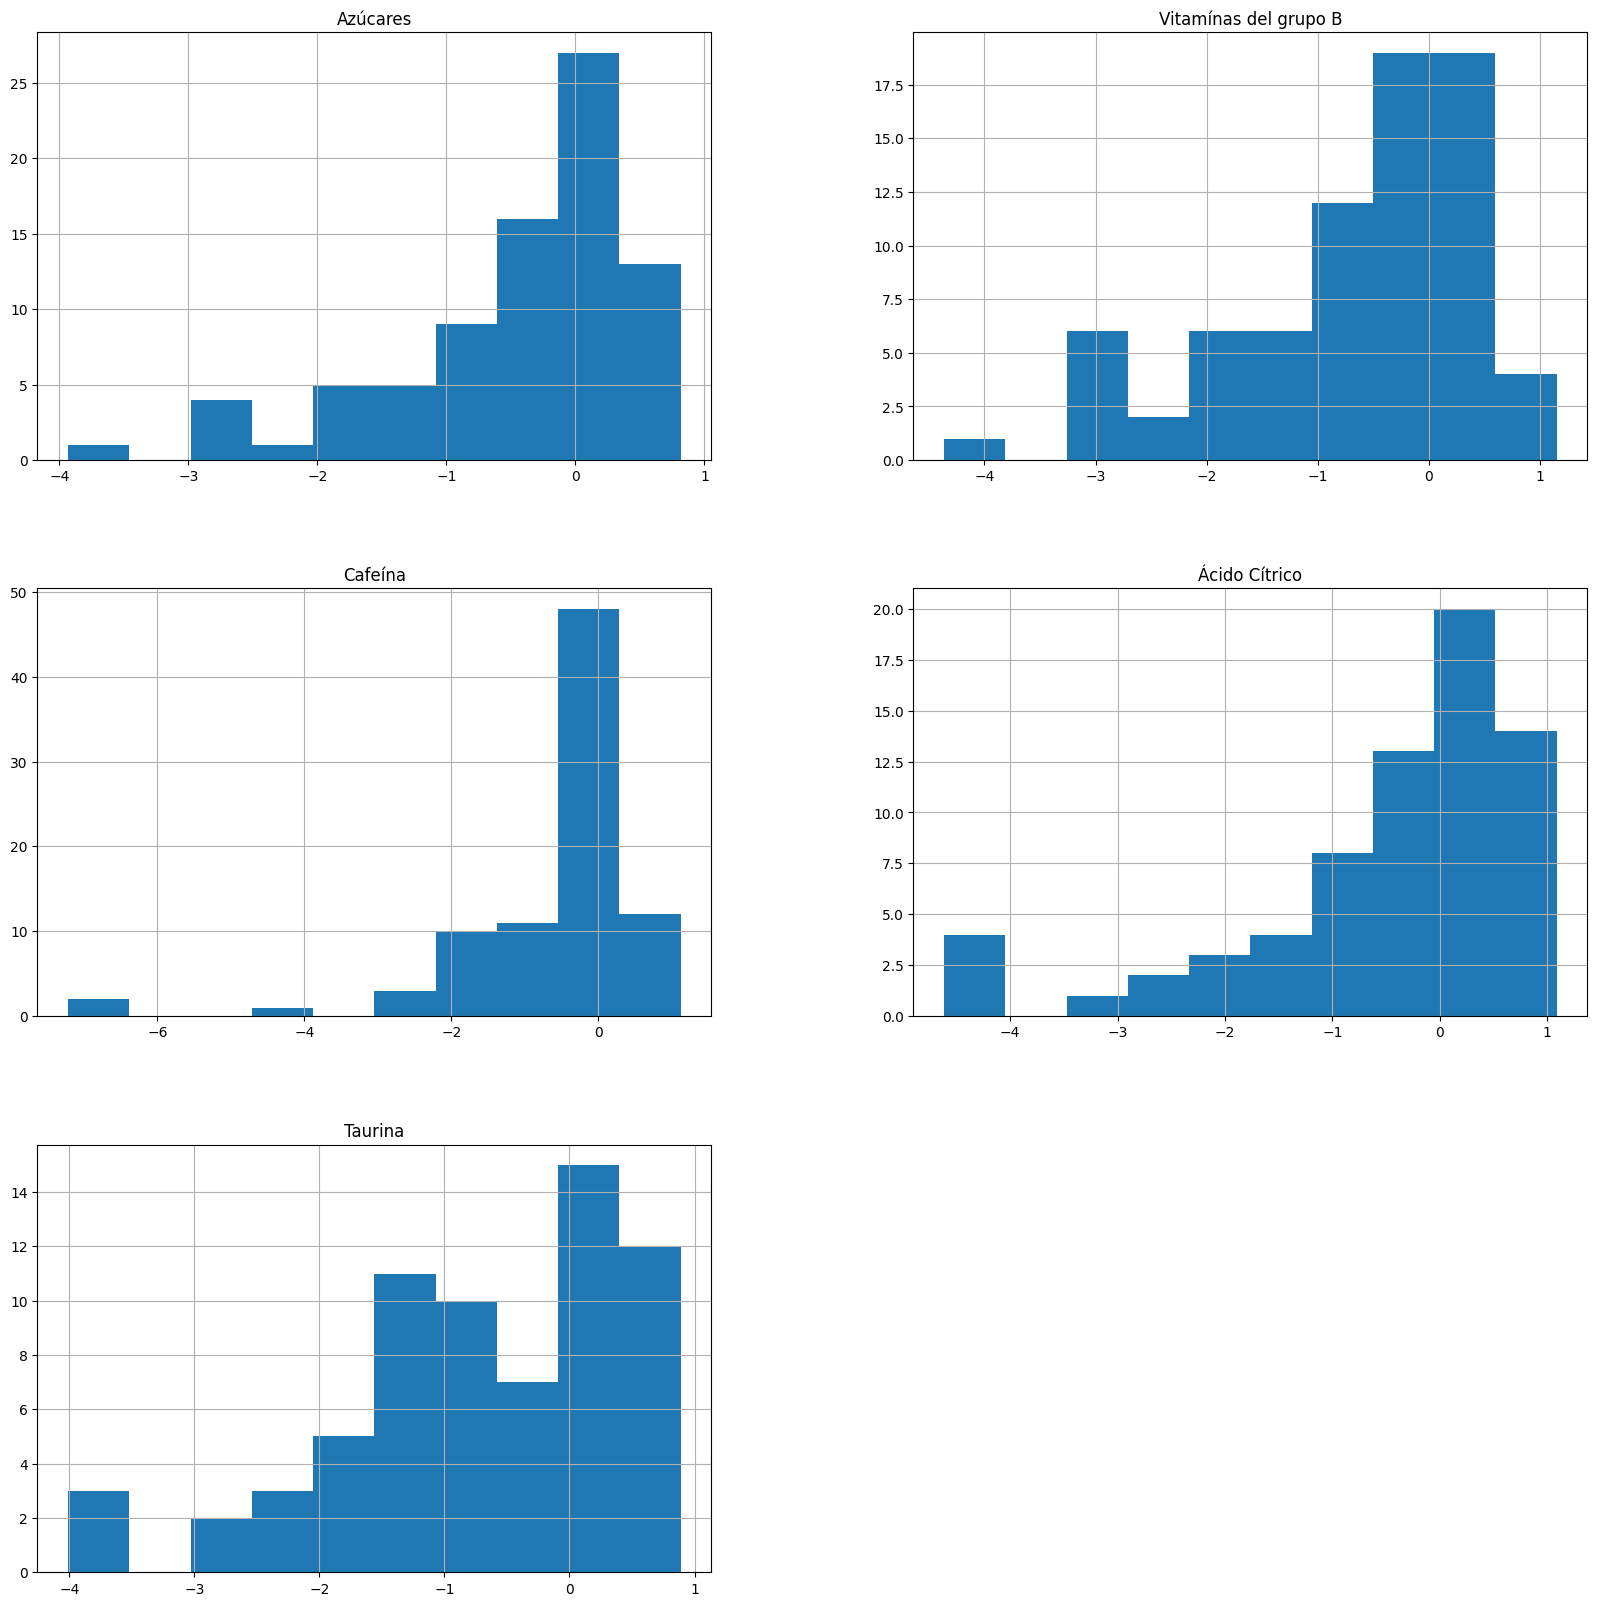

In [35]:
drink_scal = drink_scal.apply(np.log)
drink_scal.hist(figsize=(20,20))

In [116]:
drink_scal.dropna(inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

## DBSCAN

In [40]:
outlier_percent = []

for eps in np.linspace(0.001,3,50): # Genera 50 valores equidistantes entre 0.001 y 3
    
    # Creamos el modelo
    dbscan = DBSCAN(eps=eps,min_samples=2*drink.shape[1]) # min_samples dos veces el ´numero de features -> 2 por dimensión del hiperespacio en el que representamos el conjunto de puntos... No le des muchas vueltas es un número muy orientativo. Pero piensa que si fuera un recta querrías 2 valores, un plano 4, un cubo 6...
    dbscan.fit(drink)
   
     
    # Registramos el porcentaje de anomalías (recuerda que se etiquetan como -1)
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

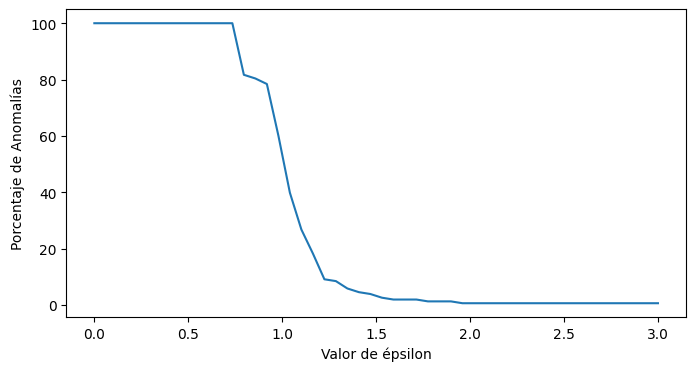

In [41]:
#Vamos a pintar ahora el porcentaje de anomalías vs el valor de eps probado
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Porcentaje de Anomalías")
plt.xlabel("Valor de épsilon")
plt.show()

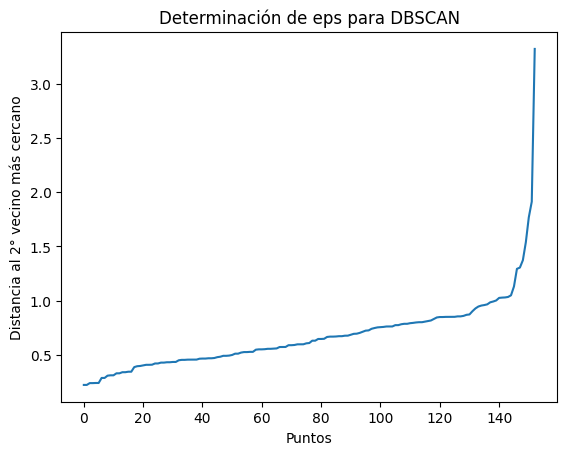

In [110]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(drink)
distances, indices = neighbors_fit.kneighbors(drink)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Puntos')
plt.ylabel('Distancia al 2° vecino más cercano')
plt.title('Determinación de eps para DBSCAN')
plt.show()

Podemos coger entre 1,3 y 2,3

In [42]:
for indice,eps in [(indice,val) for indice,val in enumerate(np.linspace(0.001,3,50)) if 1.3 <= val <= 2.3]:
    print(f"Para {eps}: {outlier_percent[indice]}% de anomalías")

Para 1.3474897959183672: 5.882352941176471% de anomalías
Para 1.4086938775510203: 4.57516339869281% de anomalías
Para 1.4698979591836734: 3.9215686274509802% de anomalías
Para 1.5311020408163265: 2.6143790849673203% de anomalías
Para 1.5923061224489796: 1.9607843137254901% de anomalías
Para 1.6535102040816325: 1.9607843137254901% de anomalías
Para 1.7147142857142856: 1.9607843137254901% de anomalías
Para 1.7759183673469388: 1.3071895424836601% de anomalías
Para 1.8371224489795916: 1.3071895424836601% de anomalías
Para 1.8983265306122448: 1.3071895424836601% de anomalías
Para 1.9595306122448979: 0.6535947712418301% de anomalías
Para 2.020734693877551: 0.6535947712418301% de anomalías
Para 2.081938775510204: 0.6535947712418301% de anomalías
Para 2.1431428571428572: 0.6535947712418301% de anomalías
Para 2.2043469387755104: 0.6535947712418301% de anomalías
Para 2.265551020408163: 0.6535947712418301% de anomalías


*A partir de 1.89 la pendiente de decrecimiento (velocidad de decrecimiento) se va ralentizando bastante, cualquier valor a partir de ahí  es interesnate. Por coger uno redondo nos quedamos con 2*

ENTRENAMIENTO (2 FORMAS)

In [76]:
#fit DBSCAN with eps = 2
#dbscan = DBSCAN(eps=2, min_samples= 2*len(df_wholesome_customers.columns.to_list()))
dbscan = DBSCAN(eps = 1, min_samples = 5)
dbscan.fit(drink)

DBSCAN(eps=1)

In [103]:
dbscan2 = DBSCAN(eps = 0.7)
dbscan2.fit(drink)

DBSCAN(eps=0.7)

In [78]:
dbscan.min_samples

5

In [94]:
dbscan2.min_samples

5

In [80]:
drink['Labels'] = dbscan.labels_
drink['Labels'].value_counts()

Labels
 0    49
 1    42
 2    34
-1    28
Name: count, dtype: int64

In [95]:
drink['Labels'] = dbscan2.labels_
drink['Labels'].value_counts()

Labels
-1    122
 2     16
 1     10
 0      5
Name: count, dtype: int64

In [96]:
# El algoritmo
print(dbscan)

# Todos los datos etiquetados
print(len(dbscan.labels_))

# Los 10 primeros labels
print(dbscan.labels_[:10])

# Cuantos clusters ha montado
print(np.unique(dbscan.labels_))

DBSCAN(eps=1)
153
[ 0  0  0 -1  0  0  0  0  0 -1]
[-1  0  1  2]


In [97]:
# El algoritmo
print(dbscan2)

# Todos los datos etiquetados
print(len(dbscan2.labels_))

# Los 10 primeros labels
print(dbscan2.labels_[:10])

# Cuantos clusters ha montado
print(np.unique(dbscan2.labels_))

DBSCAN(eps=0.7)
153
[ 0 -1  1 -1 -1 -1  1 -1 -1 -1]
[-1  0  1  2]


VISUALIZACION DE RESULTADOS

In [98]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

InvalidIndexError: (slice(None, None, None), 0)

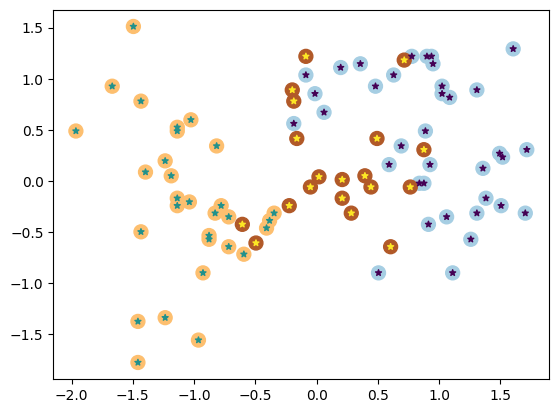

In [113]:
plot_dbscan(dbscan, drink, size = 100)


InvalidIndexError: (slice(None, None, None), 0)

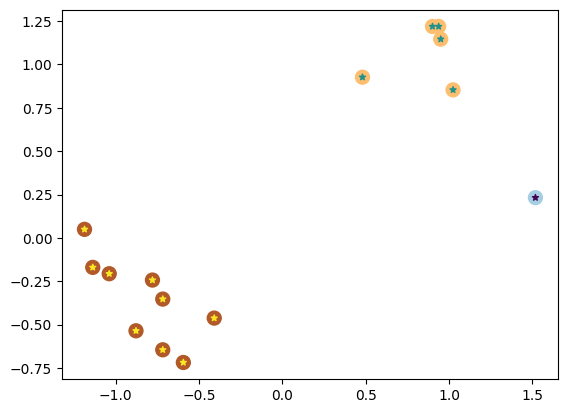

In [112]:
plot_dbscan(dbscan2, drink, size = 100)

No entiendo bien las diferencias que me salen.

## CLUSTERING JERARQUICO

Visualización previa

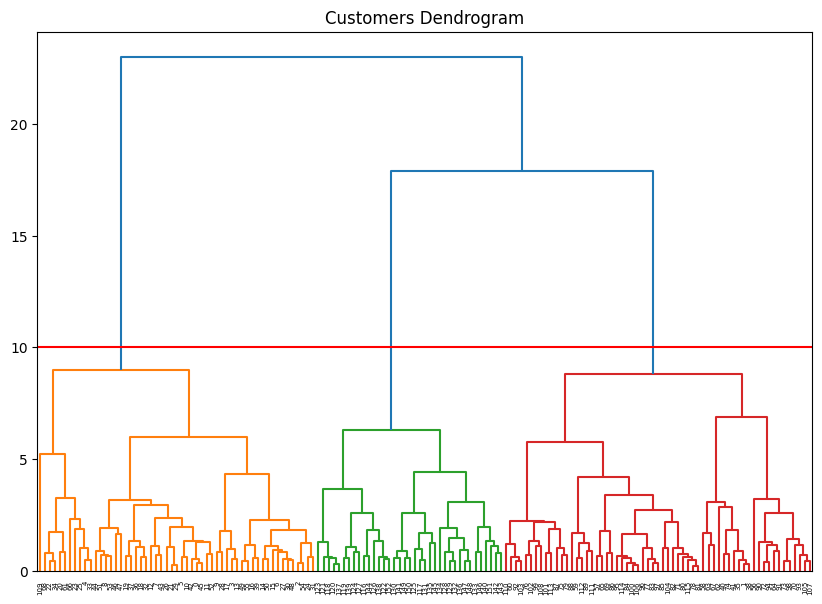

In [120]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

selected_data = drink
clusters = shc.linkage(selected_data, 
            method='ward', # Este hiperparámetro y el siguiente tienen que ver con la distancia entre clústeres y los veremos un poco más adelante
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.show()

Se recomiendan 3 clusteres segun este metodo

ENTRENAMIENTO (2 FORMAS)

In [134]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3,
                                           metric='euclidean',
                                           linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [137]:
clustering_model2 = AgglomerativeClustering(n_clusters=3,
                                           metric='euclidean',
                                           linkage='average')
clustering_model2.fit(selected_data)
clustering_model2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

VISUALIZACION

Text(0.5, 1.0, 'linkage=ward')

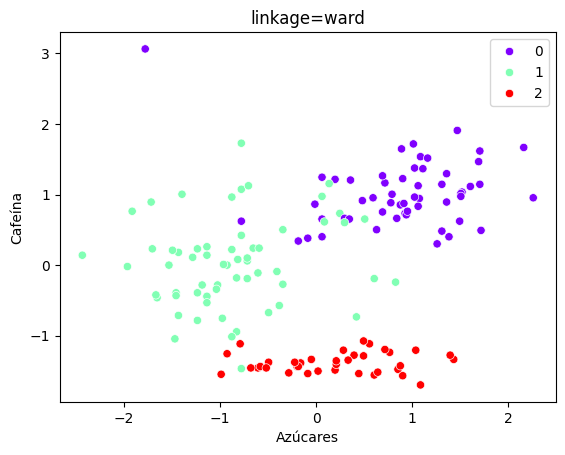

In [141]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Azúcares', 
                y='Cafeína', 
                data=selected_data, 
                hue=data_labels, palette = "rainbow").set_title('linkage=ward')


Text(0.5, 1.0, 'linkage=average')

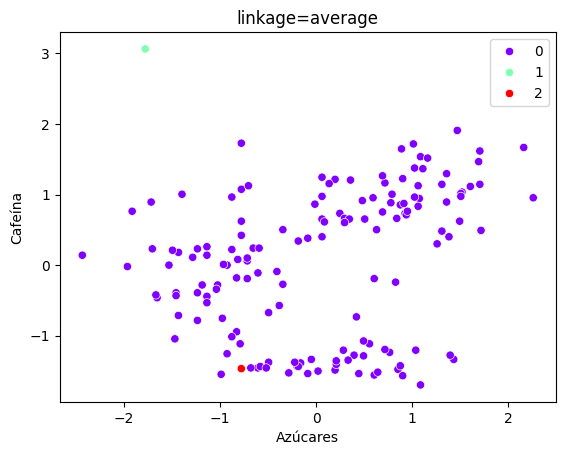

In [142]:
data_labels = clustering_model2.labels_
sns.scatterplot(x='Azúcares', 
                y='Cafeína', 
                data=selected_data, 
                hue=data_labels, palette = "rainbow").set_title('linkage=average')


Text(0.5, 1.0, 'linkage=ward')

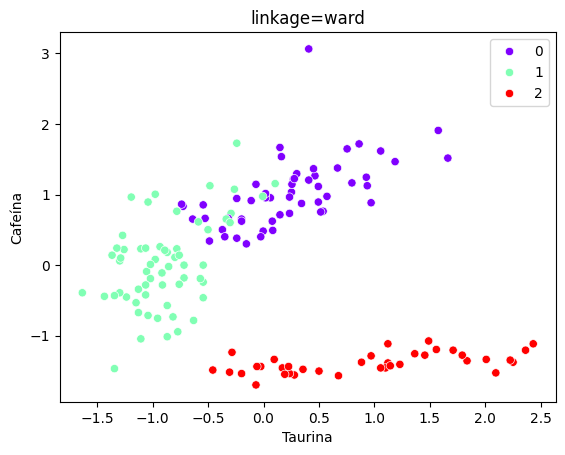

In [143]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Taurina', 
                y='Cafeína', 
                data=selected_data, 
                hue=data_labels, palette = "rainbow").set_title('linkage=ward')


Text(0.5, 1.0, 'linkage=average')

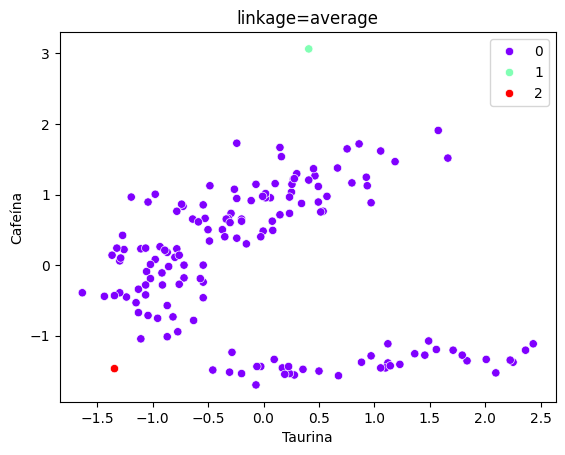

In [144]:
data_labels = clustering_model2.labels_
sns.scatterplot(x='Taurina', 
                y='Cafeína', 
                data=selected_data, 
                hue=data_labels, palette = "rainbow").set_title('linkage=average')


Text(0.5, 1.0, 'Labeled Customer Data')

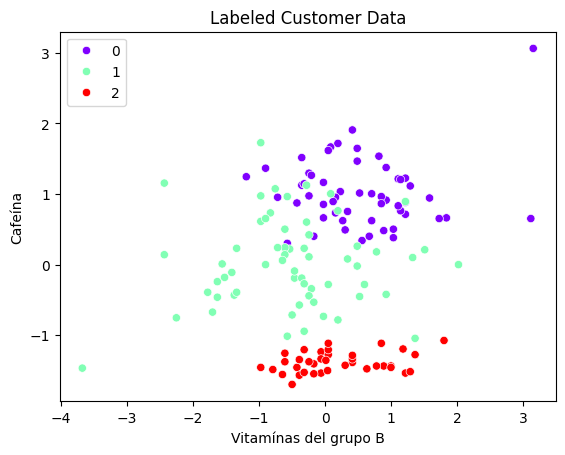

In [129]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Vitamínas del grupo B', 
                y='Cafeína', 
                data=selected_data, 
                hue=data_labels, palette = "rainbow").set_title('linkage=ward')


Text(0.5, 1.0, 'linkage=average')

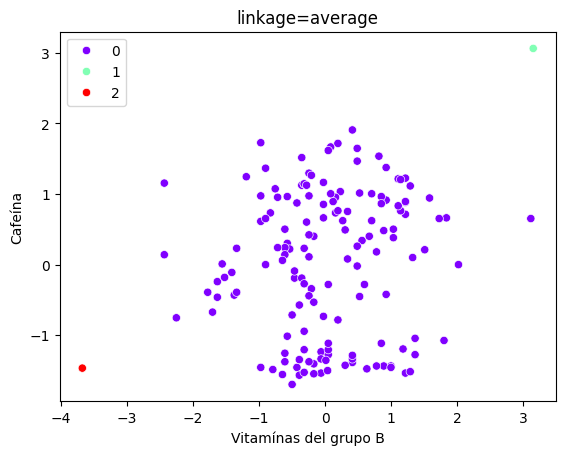

In [145]:
data_labels = clustering_model2.labels_
sns.scatterplot(x='Vitamínas del grupo B', 
                y='Cafeína', 
                data=selected_data, 
                hue=data_labels, palette = "rainbow").set_title('linkage=average')


Text(0.5, 1.0, 'linkage=ward')

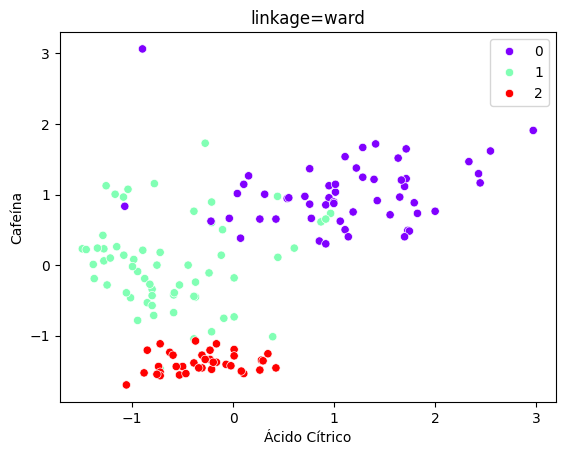

In [140]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Ácido Cítrico', 
                y='Cafeína', 
                data=selected_data, 
                hue=data_labels, palette = "rainbow").set_title('linkage=ward')


Text(0.5, 1.0, 'linkage=average')

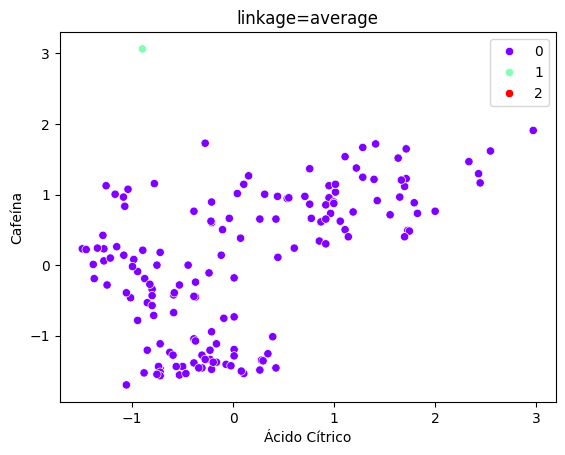

In [146]:
data_labels = clustering_model2.labels_
sns.scatterplot(x='Ácido Cítrico', 
                y='Cafeína', 
                data=selected_data, 
                hue=data_labels, palette = "rainbow").set_title('linkage=average')


Parece que ha clusterizado bien usando linkage = ward pero no linkage = average.

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [147]:
new_drink = pd.read_csv("./data/new_experiments.csv", sep= "|")

In [148]:
new_drink

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


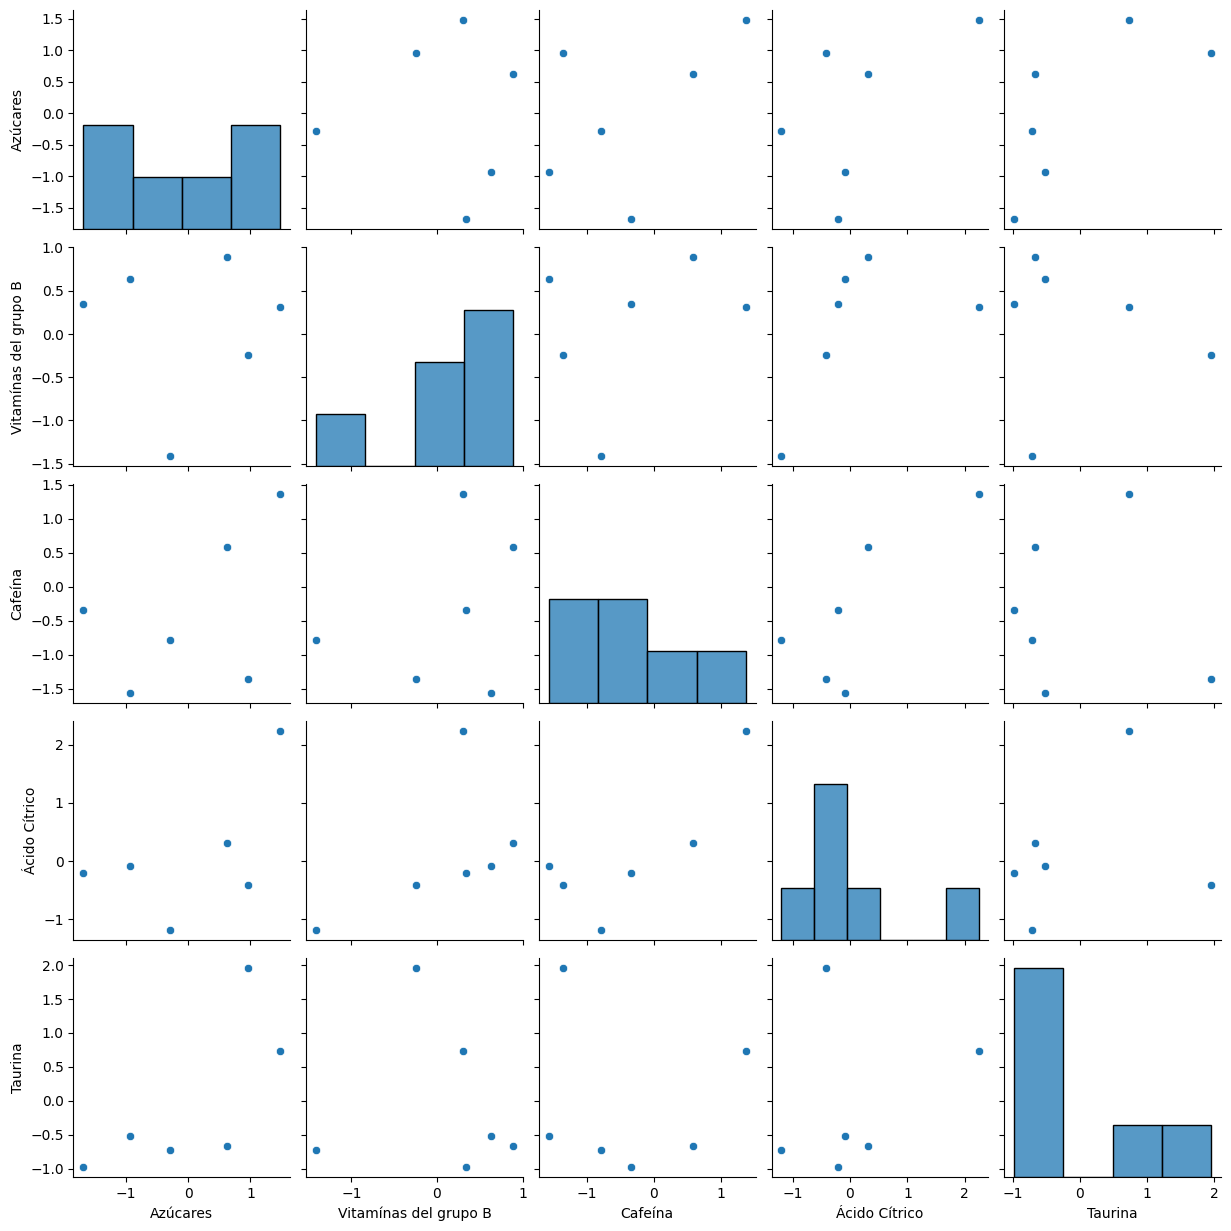

In [149]:
sns.pairplot(new_drink)

In [157]:
predicted_clusters = clustering_model.fit_predict(new_drink)

new_drink['predicted_cluster'] = predicted_clusters

new_drink


,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,predicted_cluster
0,1.481555,0.305159,1.366128,2.239039,0.731870,1
1,0.616869,0.890014,0.583034,0.312420,-0.665332,1
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,0
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,0
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,0
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043,2


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.